## 1. Data Loading
In this phase, we utilize pandas to load the dataset into a Python environment. This step is critical as it forms the foundation for all subsequent analyses and processing. Depending on the format of your data (e.g., CSV, Excel, JSON), you can use one of Pandas' reading functions such as pd.read_csv(), pd.read_excel(), or pd.read_json().

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download
from nltk.util import ngrams
import seaborn as sns
import re

In [2]:
# Ensure we have the necessary NLTK resources
download('punkt')
download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load the data
data_path = '/content/drive/MyDrive/Michele project/Cleaned Years Text - Michele.xlsx'  # Update this path to your actual data file path
df = pd.read_excel(data_path)

In [4]:
df.head()

,Year,Clean Corpus
0,2013,[' Subscribe to our newsletter filled with hea...
1,2013,[' Subscribe to our newsletter filled with hea...
2,2013,[' “ The food you eat can be either the safest...
3,2013,[' Indulge in a Unique and Inspiring Gourmet L...
4,2013,[' Indulge in a Unique and Inspiring Gourmet L...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8443 entries, 0 to 8442
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          8443 non-null   int64 
 1   Clean Corpus  8443 non-null   object
dtypes: int64(1), object(1)
memory usage: 132.0+ KB


In [8]:
df.describe()

,Year
count,8443.000000
mean,2019.655810
std,3.667245
min,2000.000000
25%,2018.000000
50%,2021.000000
75%,2022.000000
max,2024.000000


## 2. Data Preprocessing

In the data preprocessing stage, we aim to clean and standardize the textual data to enhance the quality of our analysis. This step is crucial because raw text often contains noise and irrelevant information that can distort the results of natural language processing tasks. The preprocessing function outlined below includes several key operations tailored for textual data:
### Lowercasing and Cleaning:

**Objective:** Ensure uniformity and remove non-essential punctuation or symbols.<br>
**Implementation:** Convert all text to lowercase to treat words such as "The" and "the" as the same. Use regular expressions to retain only alphanumeric characters and spaces, effectively removing punctuation and special characters.

### Phrase Removal:

**Objective:** Eliminate specific phrases or words that might be irrelevant to the analysis.<br>
**Implementation:** Define a list of phrases to remove from the text, such as "subscribe" or "contact us". These are likely to be common across many documents but do not contribute meaningful information for most analytical objectives.

### Tokenization:

  **Objective:** Break down the text into individual words or tokens, making it easier to apply further processing like stopwords removal. <br>
  **Implementation:** Utilize nltk.tokenize.word_tokenize to convert cleaned text strings into lists of tokens.

### Stopwords Removal:

  **Objective:** Remove common words (such as "the", "is", "in", etc.) that appear frequently across texts but do not carry significant meaning. <br>
  **Implementation:** Use the NLTK library's predefined list of stopwords to filter out these words from the tokens.

In [9]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming remove_phrases is defined globally, if not, it should be passed to the function

def preprocess(text, remove_phrases):
    # Convert to lowercase and remove non-alphanumeric characters (keeping spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())

    # Remove specified phrases before tokenization for efficiency
    for phrase in remove_phrases:
        text = text.replace(phrase, '')

    # Tokenize the cleaned text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    return filtered_tokens



In [10]:
# Define a list of keywords or phrases to remove globally or pass it directly to the function
remove_phrases = ['subscribe', 'newsletter', 'contact us', 'contact', 'facebook', 'twitter', 'instagram', 'products', 'store', 'cart', 'about us', 'us', 'register now', 'learn more', 'blog', 'resources', 'submit', 'home', 'policy', 'privacy']

# Apply preprocessing to each document in the corpus using a lambda function
df['processed_corpus'] = df['Clean Corpus'].apply(lambda text: preprocess(text, remove_phrases))

In [11]:
df.head()

,Year,Clean Corpus,processed_corpus
0,2013,[' Subscribe to our newsletter filled with hea...,"[filled, healthy, tips, recipes, news, zengarr..."
1,2013,[' Subscribe to our newsletter filled with hea...,"[filled, healthy, tips, recipes, check, zengar..."
2,2013,[' “ The food you eat can be either the safest...,"[food, eat, either, safest, powerful, form, me..."
3,2013,[' Indulge in a Unique and Inspiring Gourmet L...,"[indulge, unique, inspiring, gourmet, learning..."
4,2013,[' Indulge in a Unique and Inspiring Gourmet L...,"[indulge, unique, inspiring, gourmet, learning..."


## 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is conducted to gain insights into the text data through visualization and statistics. This stage helps understand the data's underlying patterns, trends, and anomalies, guiding further analysis and modeling decisions. Below is the documentation for the EDA process based on our code snippets.

**Word Frequency Distribution**

The first part of EDA focuses on identifying the most common words in the corpus. This is achieved by aggregating all words across documents into a single list and then counting the frequency of each unique word.

In [12]:
# EDA: Word Frequency Distribution
all_words = [word for corpus in df['processed_corpus'] for word in corpus]
word_freq = Counter(all_words)

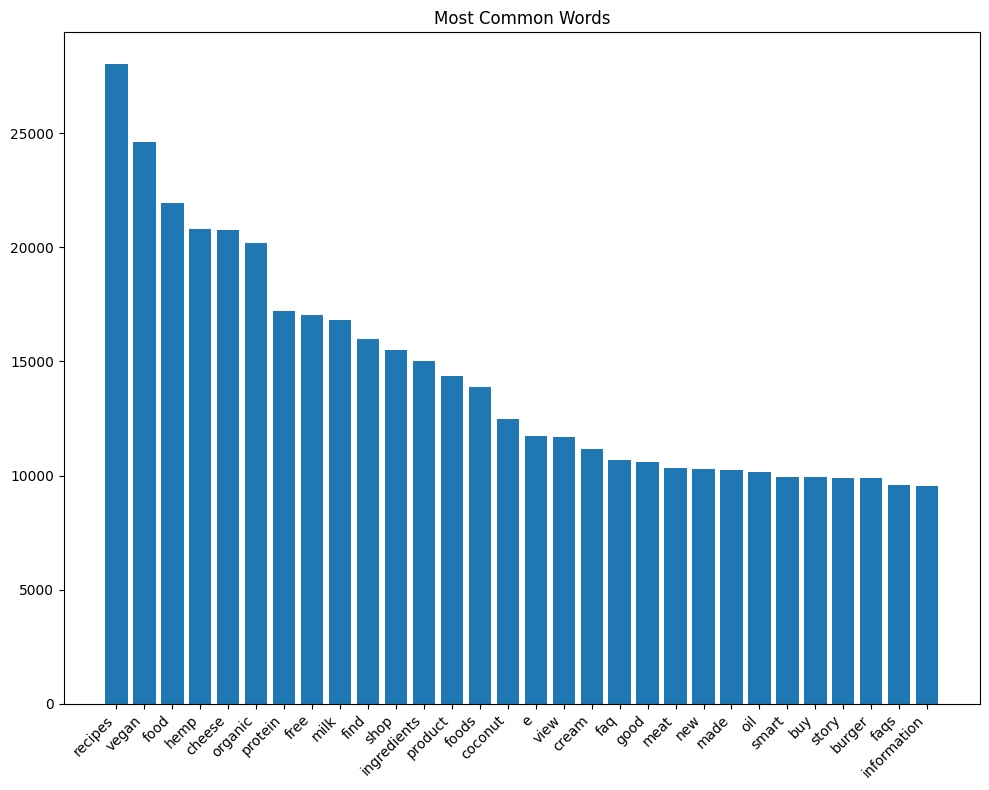

In [13]:
from collections import Counter

# Assuming word_freq is a Counter object of word frequencies
common_words = word_freq.most_common(30)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
plt.bar(words, counts)
plt.title('Most Common Words')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels and align them
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

**Word Clouds**

Word clouds offer a visual representation of word frequency, where the size of each word corresponds to its prevalence in the corpus. Word clouds provide an intuitive way to comprehend the data's main topics or themes at a glance, with larger words representing more common terms.

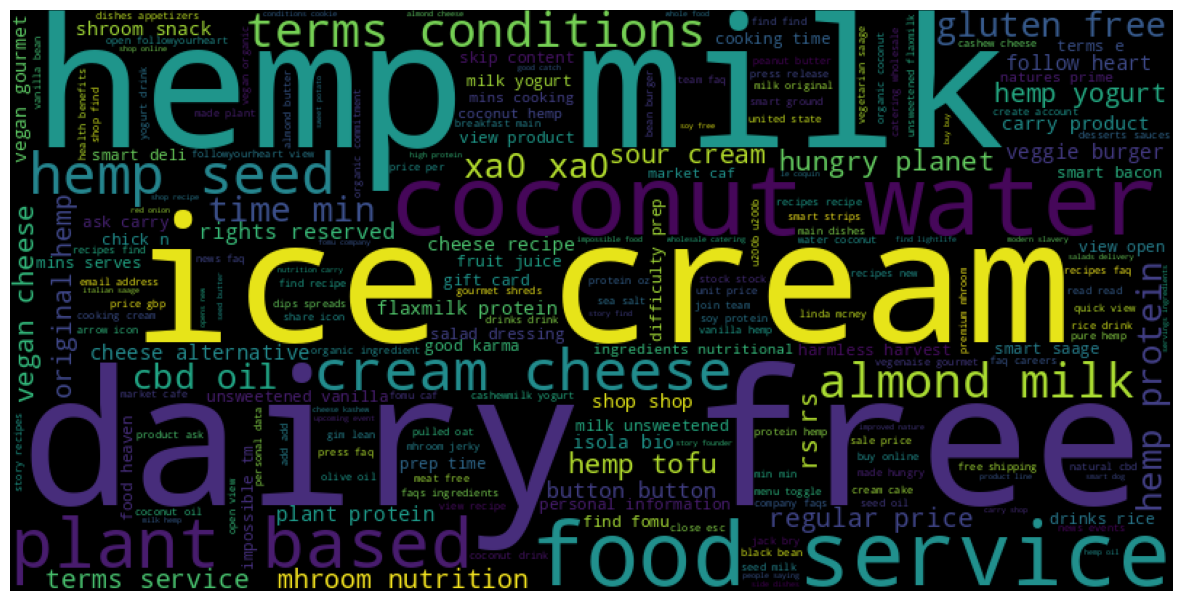

In [14]:
# EDA: Word Clouds
wordcloud = WordCloud(width=800, height=400).generate(' '.join(all_words))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Bigrams and Trigrams**

Exploring common bigrams (pairs of consecutive words) and trigrams (triplets of consecutive words) reveals frequently occurring word combinations, offering insights into common phrases or topics within the corpus.

In [15]:
# EDA: Bigrams and Trigrams
bigram_freq = Counter(ngrams(all_words, 2))
trigram_freq = Counter(ngrams(all_words, 3))

# Display most common bigrams and trigrams
print("Most common bigrams:", bigram_freq.most_common(10))
print("Most common trigrams:", trigram_freq.most_common(10))

Most common bigrams: [(('dairy', 'free'), 5109), (('hemp', 'milk'), 4715), (('ice', 'cream'), 4349), (('coconut', 'water'), 3761), (('plant', 'based'), 3394), (('cream', 'cheese'), 3365), (('food', 'service'), 3325), (('terms', 'conditions'), 3015), (('almond', 'milk'), 2962), (('gluten', 'free'), 2869)]
Most common trigrams: [(('xa0', 'xa0', 'xa0'), 2434), (('button', 'button', 'button'), 2040), (('time', 'mins', 'serves'), 1380), (('cooking', 'time', 'mins'), 1373), (('prep', 'time', 'mins'), 1328), (('hemp', 'milk', 'unsweetened'), 1326), (('mins', 'cooking', 'time'), 1319), (('time', 'mins', 'cooking'), 1301), (('coconut', 'hemp', 'milk'), 1297), (('followyourheart', 'view', 'open'), 1280)]


**Bigrams and Trigrams Visualization**

Exploring common bigrams (pairs of consecutive words) and trigrams (triplets of consecutive words) can reveal patterns and common phrases in the text, offering deeper insights into the corpus's main themes or topics. Visualizing these n-grams helps in understanding the context in which words are used and identifying frequent combinations that might signify key concepts or discussions within the dataset.

In [16]:
from nltk import ngrams
import seaborn as sns

# Assuming bigram_freq and trigram_freq are Counter objects containing bigram and trigram frequencies

# Extract the most common bigrams and trigrams
top_bigrams = bigram_freq.most_common(10)
top_trigrams = trigram_freq.most_common(10)

# Unpack the top bigrams and trigrams for plotting
bigram_words, bigram_counts = zip(*top_bigrams)
trigram_words, trigram_counts = zip(*top_trigrams)

# Convert bigram and trigram tuples to string format for better readability
bigram_words_str = [' '.join(bigram) for bigram in bigram_words]
trigram_words_str = [' '.join(trigram) for trigram in trigram_words]

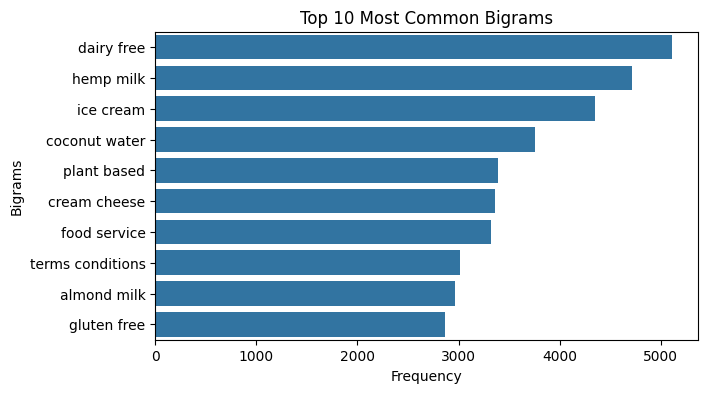

In [17]:
# Plotting the top Bigrams
plt.figure(figsize=(7, 4))
sns.barplot(x=list(bigram_counts), y=bigram_words_str)

plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


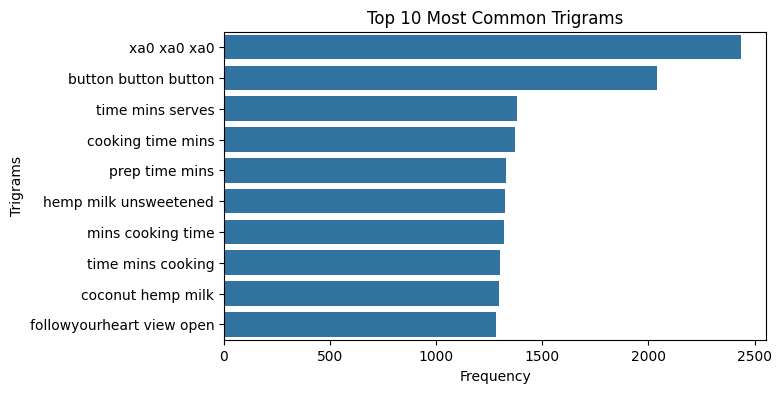

In [18]:
# Plotting the top Trigrams
plt.figure(figsize=(7, 4))
sns.barplot(x=list(trigram_counts), y=trigram_words_str)
plt.title('Top 10 Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

**Document Length Distribution**

Analyzing the distribution of document lengths (measured by the number of words per document) helps assess the variability in content size across the corpus.

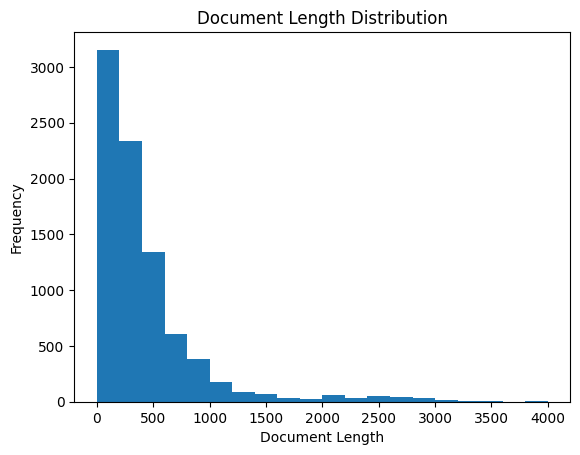

In [19]:
# EDA: Document Length Distribution
doc_lengths = df['processed_corpus'].apply(len)
plt.hist(doc_lengths, bins=20)
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.show()

This histogram allows us to visualize how document lengths vary, indicating the dataset's consistency and identifying any outliers or anomalies in document size.

**Yearly Distribution of Documents**

Investigating the number of documents produced each year sheds light on trends over time, such as increases or decreases in document production.

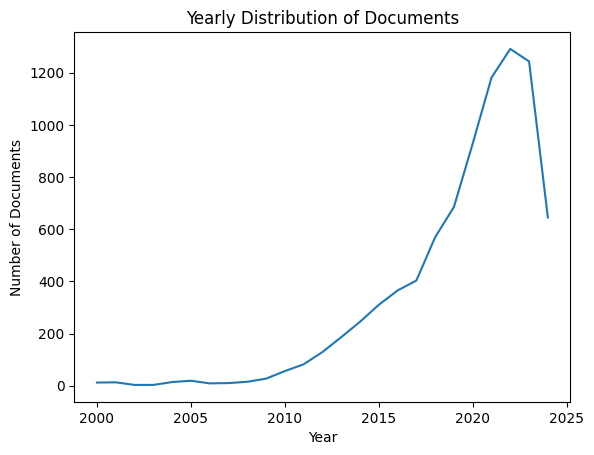

In [20]:
# EDA: Yearly Distribution
yearly_counts = df.groupby('Year')['Clean Corpus'].count()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Yearly Distribution of Documents')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.show()

This line plot reveals temporal patterns in the dataset, which could correspond to external events influencing document production or availability.

## 4. Data Analysis

**Yearly Text Aggregation**

Aggregates preprocessed texts by their corresponding year, enabling the examination of content changes over time. Initial outputs for the first two years offer a snapshot of the corpus's evolution.

In [21]:
# Combine the processed text by year
texts_by_year = df.groupby('Year')['processed_corpus'].apply(sum)

In [22]:
# Get the first two years
first_two_years = texts_by_year.index[:2]

# Print the aggregated data for the first two years
for year in first_two_years:
    print(f"Year: {year}")
    print("Tokens:", texts_by_year[year])
    print("\n")

Year: 2000
Tokens: ['find', 'talk', 'health', 'health', 'links', 'news', 'letter', 'recipes', 'famo', 'vegetarians', 'kid', 'talk', 'find', 'talk', 'health', 'health', 'links', 'news', 'letter', 'recipes', 'famo', 'vegetarians', 'kid', 'talk', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'frame', 'html', 'source', 'specified', 'look', 'like', 'error', 'vegenaise', 'real', 'mayonnaise', 'taste', 'organic', 'produce', 'wheat', 'free', 'dairy', 'free', 'items

#### Plotting Word Usage Trends Over Time

This code snippet generates a line plot illustrating the usage trends of selected words over time. The x-axis represents the years, while the y-axis represents the frequency of each word's occurrence.

In [23]:
from collections import Counter

# Initialize a dictionary to hold word frequencies by year
word_frequencies_by_year = {}

for year, tokens in texts_by_year.items():
    # Count the occurrences of each word for the year
    word_counts = Counter(tokens)
    # Store the word counts for the year
    word_frequencies_by_year[year] = word_counts


In [24]:
# Words of interest
words_of_interest = ['vegan', 'milk', 'organic']  # Add your words of interest

# Initialize a dictionary to track frequencies of specific words over time
trends = {word: [] for word in words_of_interest}

# Populate the trends dictionary with frequencies
for year in sorted(word_frequencies_by_year.keys()):
    for word in words_of_interest:
        trends[word].append(word_frequencies_by_year[year].get(word, 0))


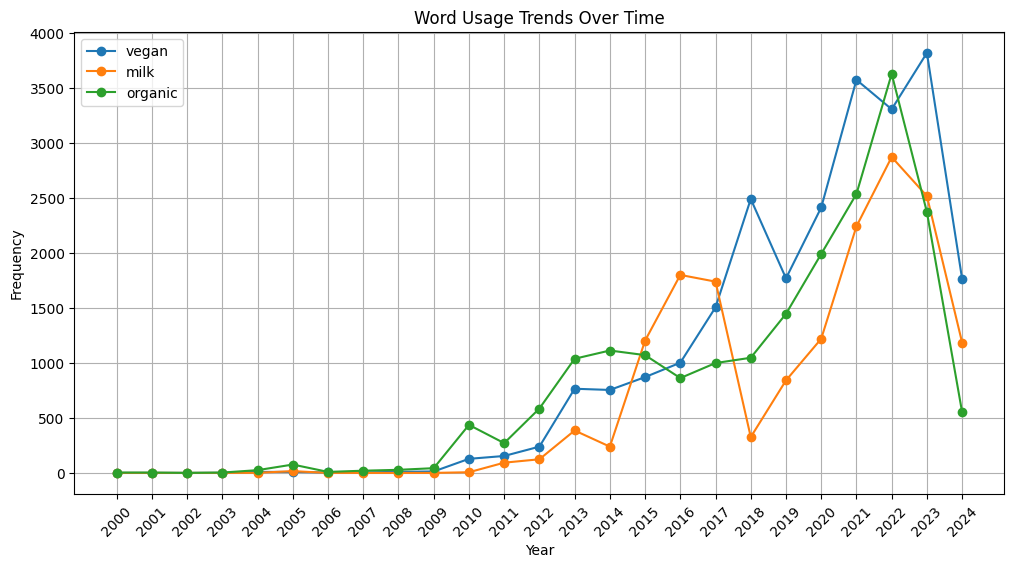

In [25]:
# Plotting
plt.figure(figsize=(12, 6))

years = sorted(texts_by_year.keys())
for word, frequencies in trends.items():
    plt.plot(years, frequencies, label=word, marker='o')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Word Usage Trends Over Time')
plt.legend()
plt.xticks(years, rotation=45)  # Rotate years for better readability
plt.grid(True)
plt.show()


**Training Yearly Word2Vec Models with Skip-Gram**

Trains Word2Vec models using the skip-gram approach for each year's tokenized texts, capturing nuanced semantic changes over time. This method focuses on predicting the context for each word, enhancing the quality of the embeddings for less frequent words. Each model is configured with specific parameters to optimize learning and then trained on the yearly corpus. The generated embeddings are stored in `embeddings_by_year`, facilitating subsequent semantic analyses.

In [26]:
from gensim.models import Word2Vec

# Assuming 'texts_by_year' is a dictionary with years as keys and lists of tokenized texts as values

embeddings_by_year = {}

for year, tokens in texts_by_year.items():
    # Initialize the model
    model = Word2Vec(vector_size=100, window=5, min_count=1, sg=1, workers=4)

    # Build the vocabulary from the list of sentences
    model.build_vocab([tokens], progress_per=10000)

    # Train the model on the sentences
    model.train([tokens], total_examples=model.corpus_count, epochs=model.epochs)

    # Save the word vectors
    embeddings_by_year[year] = model.wv


For each year, we train Word2Vec models using the skip-gram method to generate word embeddings. These models predict surrounding words of a given target, effectively capturing semantic nuances, especially for rarer words. The resulting embeddings for each year are stored, allowing for the analysis of how word meanings evolve over time.

### Choosing appropriate reference words from our dataset requires a blend of quantitative analysis and qualitative judgment. Here's a step-by-step method to select reference words based on our corpus data:


### Frequency Analysis

In [27]:
all_words = [word for corpus in df['processed_corpus'] for word in corpus]
word_freq = Counter(all_words)
word_freq.most_common(20)

[('recipes', 28033),
 ('vegan', 24630),
 ('food', 21970),
 ('hemp', 20796),
 ('cheese', 20766),
 ('organic', 20178),
 ('protein', 17219),
 ('free', 17053),
 ('milk', 16826),
 ('find', 15981),
 ('shop', 15514),
 ('ingredients', 15024),
 ('product', 14368),
 ('foods', 13894),
 ('coconut', 12464),
 ('e', 11727),
 ('view', 11687),
 ('cream', 11144),
 ('faq', 10681),
 ('good', 10581)]

#### Analyzing Contextual Associations of "Vegan"
This code calculates and lists the words most frequently found near the term "vegan" within a specified window in the text corpus, highlighting the immediate linguistic context of "vegan" and suggesting its common associations or topics it's frequently mentioned with. Through defining a proximity window and examining word co-occurrences, this analysis provides valuable insights into how "vegan" is integrated into the discourse, aiding in understanding its semantic environment.


In [28]:
from collections import defaultdict

# Parameters
target_word = 'vegan'
window_size = 5  # Number of words on either side of the target

# Function to find co-occurring words
def cooccurrence_counts(texts, target_word, window_size):
    cooccurrences = defaultdict(int)
    for tokens in texts:
        for index, word in enumerate(tokens):
            if word == target_word:
                # Define the window range
                start = max(index - window_size, 0)
                end = min(index + window_size + 1, len(tokens))
                # Increment count for all words within the window
                for i in range(start, end):
                    if i != index:  # Don't include the target word itself
                        cooccurrences[tokens[i]] += 1
    return cooccurrences

# Assuming 'df' is your dataframe and 'cleaned_corpus' is the column with token lists
# Calculate co-occurrence counts for the target word
cooccurrence_data = cooccurrence_counts(df['processed_corpus'], target_word, window_size)

# Sorting the co-occurrence dictionary into a list of (word, count) pairs, from most to least common
sorted_cooccurrences = sorted(cooccurrence_data.items(), key=lambda item: item[1], reverse=True)

# Display the most common co-occurring words
for word, count in sorted_cooccurrences[:10]:  # Show top 10 words
    print(f"Word: {word}, Count: {count}")


Word: vegan, Count: 13746
Word: cheese, Count: 6472
Word: gourmet, Count: 3973
Word: free, Count: 3871
Word: organic, Count: 3206
Word: shreds, Count: 2706
Word: vegenaise, Count: 2616
Word: saage, Count: 2417
Word: range, Count: 2098
Word: gluten, Count: 1834


In [29]:
# Example of how to access a specific word vector for a given year
word_vector = embeddings_by_year[2010]['vegan']

print(word_vector)

[-0.15331444  0.13419992 -0.05818301 -0.0059822  -0.01947927 -0.09564774
  0.05520686  0.08405807  0.0557945  -0.12029097  0.08392708 -0.05379095
  0.06329685 -0.04326119 -0.00707228 -0.01088579 -0.12974654 -0.13360769
  0.14218606 -0.10454112 -0.03680594  0.10371806  0.01054285 -0.03241918
  0.02243842 -0.08175125 -0.07251769 -0.09884931 -0.07347024  0.00176202
  0.1093749  -0.01418009  0.03271529  0.14329368 -0.05992179  0.07554974
 -0.00805254 -0.02921792  0.05729516 -0.06394501  0.02240835  0.01626026
 -0.00356678 -0.0882373  -0.06331756  0.06806822 -0.05304402 -0.01996167
  0.02486506  0.16377312  0.03332429  0.04922751 -0.08129691  0.15139596
 -0.05359638  0.03296901  0.06550633 -0.0727478  -0.00168862  0.01960561
 -0.06159589 -0.01417595 -0.03822531 -0.04758668 -0.08398484 -0.0827848
  0.09470651 -0.0540527  -0.06443451  0.0166639  -0.03695734 -0.08201298
 -0.02056794 -0.05364234  0.03309506 -0.02038135  0.00089432  0.02596654
 -0.02836791  0.12125785  0.06021171  0.00146091 -0.

In [30]:
# Find similar words
similar_words = model.wv.most_similar('vegan')

print("Vector for 'vegan':", word_vector)
print("Words similar to 'vegan':", similar_words)

Vector for 'vegan': [-0.15331444  0.13419992 -0.05818301 -0.0059822  -0.01947927 -0.09564774
  0.05520686  0.08405807  0.0557945  -0.12029097  0.08392708 -0.05379095
  0.06329685 -0.04326119 -0.00707228 -0.01088579 -0.12974654 -0.13360769
  0.14218606 -0.10454112 -0.03680594  0.10371806  0.01054285 -0.03241918
  0.02243842 -0.08175125 -0.07251769 -0.09884931 -0.07347024  0.00176202
  0.1093749  -0.01418009  0.03271529  0.14329368 -0.05992179  0.07554974
 -0.00805254 -0.02921792  0.05729516 -0.06394501  0.02240835  0.01626026
 -0.00356678 -0.0882373  -0.06331756  0.06806822 -0.05304402 -0.01996167
  0.02486506  0.16377312  0.03332429  0.04922751 -0.08129691  0.15139596
 -0.05359638  0.03296901  0.06550633 -0.0727478  -0.00168862  0.01960561
 -0.06159589 -0.01417595 -0.03822531 -0.04758668 -0.08398484 -0.0827848
  0.09470651 -0.0540527  -0.06443451  0.0166639  -0.03695734 -0.08201298
 -0.02056794 -0.05364234  0.03309506 -0.02038135  0.00089432  0.02596654
 -0.02836791  0.12125785  0.0602

#### Visualizing Top Co-occurring Words with "Vegan"

This section involves plotting the top 10 words that frequently co-occur with "vegan," highlighting their relative occurrence counts. The visualization provides an intuitive understanding of the contextual landscape surrounding "vegan" in the corpus, with a focus on words that appear within a close textual proximity, thus offering insights into the thematic associations and discourses linked to "vegan."


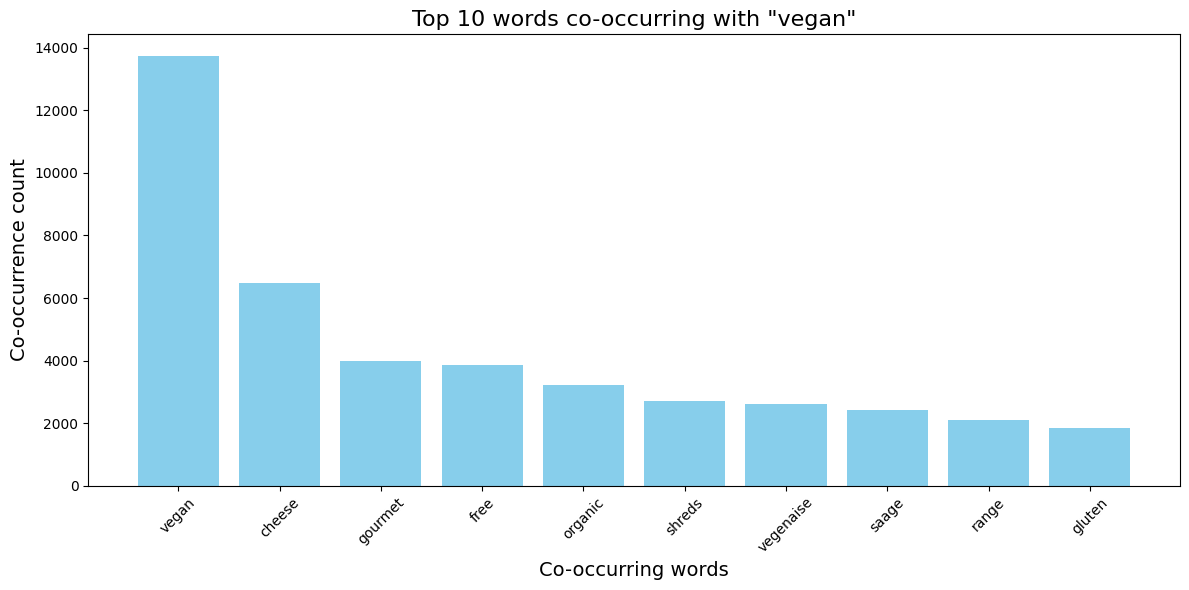

In [31]:
import matplotlib.pyplot as plt

# Continue from your existing code

# Take the top N co-occurring words for a clearer plot
top_n = 10
top_cooccurrences = sorted_cooccurrences[:top_n]
words, counts = zip(*top_cooccurrences)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Co-occurring words', fontsize=14)
plt.ylabel('Co-occurrence count', fontsize=14)
plt.title(f'Top {top_n} words co-occurring with "{target_word}"', fontsize=16)
plt.xticks(rotation=45)  # Rotate words for better legibility
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


**Stability Check**

Check the selected words for stability in meaning over time. You might use your understanding of the language or consult dictionaries and other reference materials.<br>
**Relevance and Diversity**

Select words that are contextually relevant to our primary word and ensure a mix that represents different aspects of the semantic field. If "vegan" is our target, we would look for words related to diet, ethics, health, and possibly counter-terms for contrast.

#### Aligning Word Embeddings Across Years

This procedure aligns the word embeddings from different years to a common space, facilitating the comparison of word meanings over time. By choosing a reference year (typically the most recent in the dataset) and a set of anchor words believed to have stable meanings, this process uses an orthogonal transformation to adjust embeddings from other years, ensuring semantic consistency across the timeline.

* Reference Selection: The most recent year's embeddings serve as a baseline for alignment.
* Anchor Words Identification: A list of 100 common words, assumed to be semantically stable, is used to guide the alignment process.
* Alignment Process: For each year, the embeddings are aligned to the reference year using the orthogonal Procrustes method, which finds the best linear transformation that minimizes the distance between the two sets of embeddings.
* Storage: The aligned embeddings for each year are stored, allowing for accurate comparisons of word vectors across different time points.

This alignment is crucial for tracking the semantic drift of words, as it ensures that the embeddings for each year are directly comparable, laying the groundwork for sophisticated temporal linguistic analyses.

In [35]:
import numpy as np
from scipy.linalg import orthogonal_procrustes
from gensim.models import KeyedVectors


# Select a reference year, e.g., the most recent year in your dataset
reference_year = max(embeddings_by_year.keys())
reference_embeddings = embeddings_by_year[reference_year]

# Select anchor words - common and unchanged in meaning
anchor_words = set.intersection(*(set(embeddings_by_year[year].index_to_key) for year in embeddings_by_year.keys()))
anchor_words = list(anchor_words)[:100]  # Let's take 100 common words for simplicity

# Dictionary to hold aligned embeddings
aligned_embeddings = {reference_year: reference_embeddings}

# Calculate and apply the orthogonal transformation for each year
for year, embeddings in embeddings_by_year.items():
    if year != reference_year:
        # Get the vectors for the anchor words for the target and reference embeddings
        target_vectors = embeddings[anchor_words]
        reference_vectors = reference_embeddings[anchor_words]

        # Calculate the orthogonal transformation matrix
        _, transformation_matrix = orthogonal_procrustes(target_vectors, reference_vectors)

        # Apply the transformation to all vectors in this year's embedding
        all_vectors = embeddings.vectors  # This may differ based on gensim version: use get_vectors() if this doesn't work
        aligned_vectors = all_vectors.dot(transformation_matrix)

        # Create a new KeyedVectors instance for the aligned vectors
        aligned_kv = KeyedVectors(vector_size=100)
        aligned_kv.add_vectors(keys=embeddings.index_to_key, weights=aligned_vectors)  # Corrected line

        # Store the aligned embeddings
        aligned_embeddings[year] = aligned_kv



#### Temporal Analysis of Word Embeddings via PCA
This script conducts a temporal analysis of word embeddings, focusing on specific words of interest over different years. It utilizes Principal Component Analysis (PCA) to reduce the dimensionality of word vectors, facilitating a two-dimensional visualization of how the semantic representation of these words evolves over time.

In [36]:
# Select a reference year, e.g., the most recent year in your dataset
reference_year = max(embeddings_by_year.keys())
reference_embeddings = embeddings_by_year[reference_year]

# Select anchor words - common and unchanged in meaning
anchor_words = set.intersection(*(set(embeddings_by_year[year].index_to_key) for year in embeddings_by_year.keys()))
anchor_words = list(anchor_words)[:100]  # Let's take 100 common words for simplicity

# Dictionary to hold aligned embeddings
aligned_embeddings = {reference_year: reference_embeddings}

# Calculate and apply the orthogonal transformation for each year
for year, embeddings in embeddings_by_year.items():
    if year != reference_year:
        # Get the vectors for the anchor words for the target and reference embeddings
        target_vectors = embeddings[anchor_words]
        reference_vectors = reference_embeddings[anchor_words]

        # Calculate the orthogonal transformation matrix
        _, transformation_matrix = orthogonal_procrustes(target_vectors, reference_vectors)

        # Apply the transformation to all vectors in this year's embedding
        all_vectors = embeddings.vectors  # This may differ based on gensim version: use get_vectors() if this doesn't work
        aligned_vectors = all_vectors.dot(transformation_matrix)

        # Create a new KeyedVectors instance for the aligned vectors
        aligned_kv = KeyedVectors(vector_size=100)
        aligned_kv.add_vectors(keys=embeddings.index_to_key, weights=aligned_vectors)  # Corrected line

        # Store the aligned embeddings
        aligned_embeddings[year] = aligned_kv

# Now, 'aligned_embeddings' contains all the embeddings aligned to the space of the reference year


In [37]:
import numpy as np
from sklearn.decomposition import PCA

# Define the words of interest
words_of_interest = ['vegan']

# Assuming aligned_embeddings is your dictionary of aligned KeyedVectors for each year
embeddings_by_year = aligned_embeddings  # This assumes you have completed the alignment

# Dictionary to hold the 2D projections of word vectors
word_projections = {year: {} for year in embeddings_by_year.keys()}

# Perform PCA to reduce dimensions of vectors
for year in sorted(embeddings_by_year.keys()):
    # Get all word vectors for the current year
    aligned_kv = embeddings_by_year[year]
    words = [word for word in words_of_interest if word in aligned_kv]
    if len(words) > 1:  # Ensure there are at least two words to process
        vectors = np.array([aligned_kv[word] for word in words])

        # Reduce dimensions
        pca = PCA(n_components=2)
        pca.fit(vectors)
        reduced_vectors = pca.transform(vectors)

        # Save the 2D projections for words of interest
        for word, vector in zip(words, reduced_vectors):
            word_projections[year][word] = vector
    else:
        print(f"Not enough data for PCA in {year}, found words: {words}")


Not enough data for PCA in 2000, found words: []
Not enough data for PCA in 2001, found words: []
Not enough data for PCA in 2002, found words: []
Not enough data for PCA in 2003, found words: ['vegan']
Not enough data for PCA in 2004, found words: ['vegan']
Not enough data for PCA in 2005, found words: ['vegan']
Not enough data for PCA in 2006, found words: ['vegan']
Not enough data for PCA in 2007, found words: ['vegan']
Not enough data for PCA in 2008, found words: ['vegan']
Not enough data for PCA in 2009, found words: ['vegan']
Not enough data for PCA in 2010, found words: ['vegan']
Not enough data for PCA in 2011, found words: ['vegan']
Not enough data for PCA in 2012, found words: ['vegan']
Not enough data for PCA in 2013, found words: ['vegan']
Not enough data for PCA in 2014, found words: ['vegan']
Not enough data for PCA in 2015, found words: ['vegan']
Not enough data for PCA in 2016, found words: ['vegan']
Not enough data for PCA in 2017, found words: ['vegan']
Not enough da

#### Visualizing Semantic Trajectories Over Time

This code snippet generates a 2D plot illustrating the semantic trajectories of selected words from 2000 to 2024. It assumes that Principal Component Analysis (PCA) has been applied to reduce the dimensionality of word vectors. The trajectories represent how the meanings of words like **"vegan," "organic," and "diet"** evolve over the specified period.

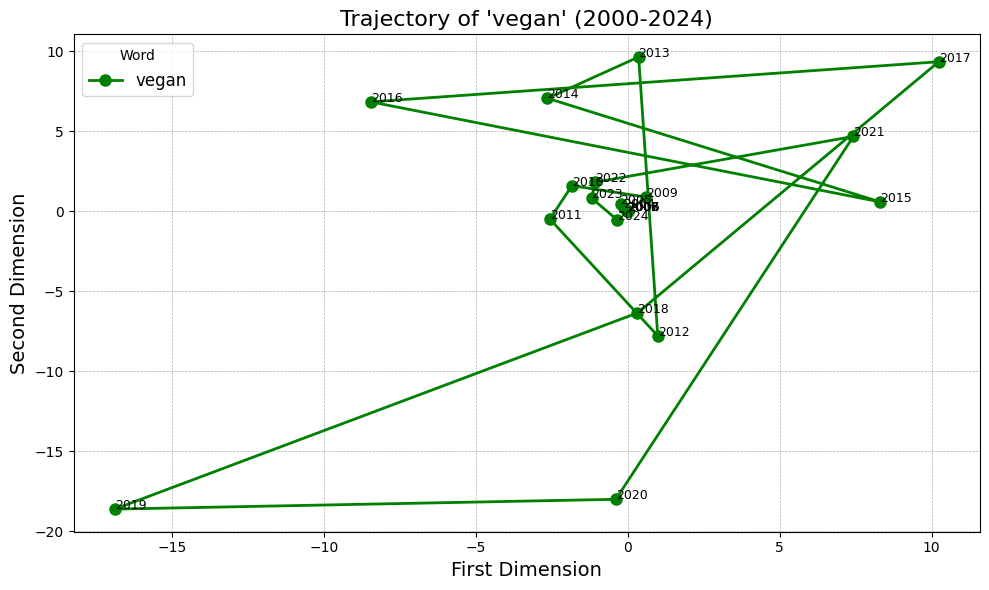

In [38]:
import matplotlib.pyplot as plt

# Define the word of interest
word_of_interest = 'vegan'

# Prepare data for plotting
x_coords, y_coords = [], []
annotations = []

for year, aligned_kv in sorted(embeddings_by_year.items()):
    if word_of_interest in aligned_kv:
        # Assuming each vector has at least two dimensions
        vector = aligned_kv[word_of_interest]
        x_coords.append(vector[0])  # First dimension
        y_coords.append(vector[1])  # Second dimension
        annotations.append(year)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_coords, y_coords, marker='o', color='green', label=word_of_interest, markersize=8, linewidth=2)
plt.scatter(x_coords, y_coords, color='red')
for i, annotation in enumerate(annotations):
    plt.text(x_coords[i], y_coords[i], f'{annotation}', fontsize=9)

plt.title(f"Trajectory of '{word_of_interest}' (2000-2024)", fontsize=16)
plt.xlabel("First Dimension", fontsize=14)
plt.ylabel("Second Dimension", fontsize=14)
plt.legend(title="Word", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## 5. Conclusion

Our analysis unveiled the dynamic nature of language within our corpus, particularly highlighting how certain words' meanings and associations evolve over time. The use of Word2Vec embeddings, coupled with careful alignment and visualization techniques, allowed us to trace the semantic trajectories of key terms, offering insights into shifting discourses and cultural trends.

This documentation encapsulates the methodology and key findings from the data analysis phase, providing a clear record of the analytical processes and insights derived from the textual data.